In [2]:

#importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#load the images
x_train='C:/Users/ADMIN/Downloads/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
x_valid='C:/Users/ADMIN/Downloads/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'
x_test='C:/Users/ADMIN/Downloads/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'


In [4]:
# Define data augmentation pipeline
datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [5]:
# Load data using the ImageDataGenerator
train_dataset = datagen.flow_from_directory(
    x_train,  
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',  
    shuffle=True
)

Found 6225 images belonging to 11 classes.


In [6]:
valid_dataset = datagen.flow_from_directory(
    x_valid,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Found 1092 images belonging to 11 classes.


In [7]:
test_dataset = datagen.flow_from_directory(
    x_test,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


In [8]:
# Define a simple CNN model from scratch
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')  
])

In [9]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the CNN model
cnn_history = cnn_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=25
)

Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.2840 - loss: 2.0819 - val_accuracy: 0.5330 - val_loss: 1.3070
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.5449 - loss: 1.2416 - val_accuracy: 0.6767 - val_loss: 0.8788
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.7045 - loss: 0.8244 - val_accuracy: 0.7363 - val_loss: 0.7185
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.7782 - loss: 0.6228 - val_accuracy: 0.7912 - val_loss: 0.5603
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8178 - loss: 0.5096 - val_accuracy: 0.8480 - val_loss: 0.4498
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.8377 - loss: 0.4561 - val_accuracy: 0.8764 - val_loss: 0.3953
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.8731 - loss: 0.3653 - val_accuracy: 0.8938 - val_loss: 0.3105
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.8954 - loss: 0.2903 - val_accu

In [11]:
#VGG16

from tensorflow.keras.applications import VGG16

In [12]:
# Freeze base model

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
vgg16_base.trainable = False  

In [13]:
model_vgg16 = models.Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')
])

In [14]:
model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
vgg16_history = model_vgg16.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=25
)

Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1518s 8s/step - accuracy: 0.4272 - loss: 2.3870 - val_accuracy: 0.7152 - val_loss: 0.9107
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1523s 8s/step - accuracy: 0.8022 - loss: 0.6611 - val_accuracy: 0.7940 - val_loss: 0.6081
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1520s 8s/step - accuracy: 0.8932 - loss: 0.3805 - val_accuracy: 0.8810 - val_loss: 0.3612
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1518s 8s/step - accuracy: 0.9144 - loss: 0.2898 - val_accuracy: 0.9103 - val_loss: 0.2832
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1550s 8s/step - accuracy: 0.9272 - loss: 0.2323 - val_accuracy: 0.9112 - val_loss: 0.2659
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1527s 8s/step - accuracy: 0.9358 - loss: 0.2046 - val_accuracy: 0.8681 - val_loss: 0.3488
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1521s 8s/step - accuracy: 0.9330 - loss: 0.1940 - val_accuracy: 0.9396 - val_loss: 0.1965
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 9341s 48s/step - accuracy: 0.9402 - loss: 0.1842 -

In [16]:
#ResNet50

from tensorflow.keras.applications import ResNet50

In [17]:
 # Freeze base model

resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
resnet50_base.trainable = False 

In [18]:
model_resnet50 = models.Sequential([
    resnet50_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')
])


In [19]:
model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
resnet50_history = model_resnet50.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=25
)

Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 633s 3s/step - accuracy: 0.1185 - loss: 7.3517 - val_accuracy: 0.1703 - val_loss: 2.3792
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 632s 3s/step - accuracy: 0.1692 - loss: 2.4369 - val_accuracy: 0.1712 - val_loss: 2.3611
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.1711 - loss: 2.4864 - val_accuracy: 0.1712 - val_loss: 2.3475
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.1746 - loss: 2.3414 - val_accuracy: 0.1712 - val_loss: 2.3374
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 625s 3s/step - accuracy: 0.1723 - loss: 2.3315 - val_accuracy: 0.1712 - val_loss: 2.3300
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 664s 3s/step - accuracy: 0.1694 - loss: 2.3490 - val_accuracy: 0.1712 - val_loss: 2.3248
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 698s 4s/step - accuracy: 0.1774 - loss: 2.3504 - val_accuracy: 0.1712 - val_loss: 2.3211
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 694s 4s/step - accuracy: 0.1814 - loss: 2.3092 - val_accu

In [21]:
#mobilenet


from tensorflow.keras.applications import MobileNet

In [22]:
 # Freeze base model


mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
mobilenet_base.trainable = False 

In [23]:
model_mobilenet = models.Sequential([
    mobilenet_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')
])


In [24]:
model_mobilenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
mobilenet_history = model_mobilenet.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=25
)


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.6450 - loss: 4.9270 - val_accuracy: 0.9249 - val_loss: 0.2568
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9404 - loss: 0.2171 - val_accuracy: 0.9396 - val_loss: 0.1824
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9564 - loss: 0.1587 - val_accuracy: 0.9396 - val_loss: 0.2152
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9551 - loss: 0.1953 - val_accuracy: 0.9771 - val_loss: 0.0980
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9658 - loss: 0.1320 - val_accuracy: 0.9670 - val_loss: 0.1786
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9711 - loss: 0.1345 - val_accuracy: 0.9744 - val_loss: 0.0942
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9800 - loss: 0.0736 - val_accuracy: 0.9734 - val_loss: 0.1253
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9814 - loss: 0.0667 - val_accu

In [26]:
from tensorflow.keras.applications import InceptionV3

In [27]:
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
inception_base.trainable = False  # Freeze base model

model_inception = models.Sequential([
    inception_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')
])

In [28]:
model_inception.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [29]:
inception_history = model_inception.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=25
)


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.3075 - loss: 6.4883 - val_accuracy: 0.7912 - val_loss: 0.8822
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.8278 - loss: 0.6574 - val_accuracy: 0.8755 - val_loss: 0.5005
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.8713 - loss: 0.4746 - val_accuracy: 0.8480 - val_loss: 0.4350
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.8743 - loss: 0.3825 - val_accuracy: 0.8452 - val_loss: 0.3884
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.8854 - loss: 0.3136 - val_accuracy: 0.8956 - val_loss: 0.3190
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.9153 - loss: 0.2661 - val_accuracy: 0.9139 - val_loss: 0.2614
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.9240 - loss: 0.2327 - val_accuracy: 0.9286 - val_loss: 0.1953
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.9294 - loss: 0.2193 - val_accu

In [30]:
from tensorflow.keras.applications import EfficientNetB0

In [31]:
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
efficientnet_base.trainable = False  # Freeze base model


In [32]:
model_efficientnet = models.Sequential([
    efficientnet_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')
])

In [33]:
model_efficientnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

efficientnet_history = model_efficientnet.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=25
)


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.1108 - loss: 7.0082 - val_accuracy: 0.1712 - val_loss: 2.3825
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.1726 - loss: 2.3780 - val_accuracy: 0.1712 - val_loss: 2.3632
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.1727 - loss: 2.3997 - val_accuracy: 0.1712 - val_loss: 2.3489
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.1764 - loss: 2.3429 - val_accuracy: 0.1712 - val_loss: 2.3383
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.1741 - loss: 2.3316 - val_accuracy: 0.1712 - val_loss: 2.3307
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.1715 - loss: 2.3247 - val_accuracy: 0.1712 - val_loss: 2.3251
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.1762 - loss: 2.3154 - val_accuracy: 0.1712 - val_loss: 2.3211
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.1720 - loss: 2.3137 - val_accu

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [35]:
# Evaluate each model on the test dataset
models = [cnn_model, model_vgg16, model_resnet50, model_mobilenet, model_inception, model_efficientnet]
model_names = ["CNN", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"]


100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 735ms/step - accuracy: 0.9418 - loss: 0.1915
CNN Test Accuracy: 0.9400690197944641
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 698ms/step
Classification Report for CNN:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       520
           1       0.00      0.00      0.00        13
           2       1.00      0.91      0.95       298
           3       0.81      0.91      0.86       305
           4       0.98      0.94      0.96       286
           5       0.98      0.99      0.98       291
           6       0.92      0.96      0.94       273
           7       0.94      0.87      0.90       327
           8       0.99      1.00      0.99       289
           9       0.93      0.97      0.95       293
          10       0.99      0.98      0.98       292

    accuracy                           0.95      3187
   macro avg       0.86      0.86      0.86      3187
weighted avg       0.95      0.95      0.95      31

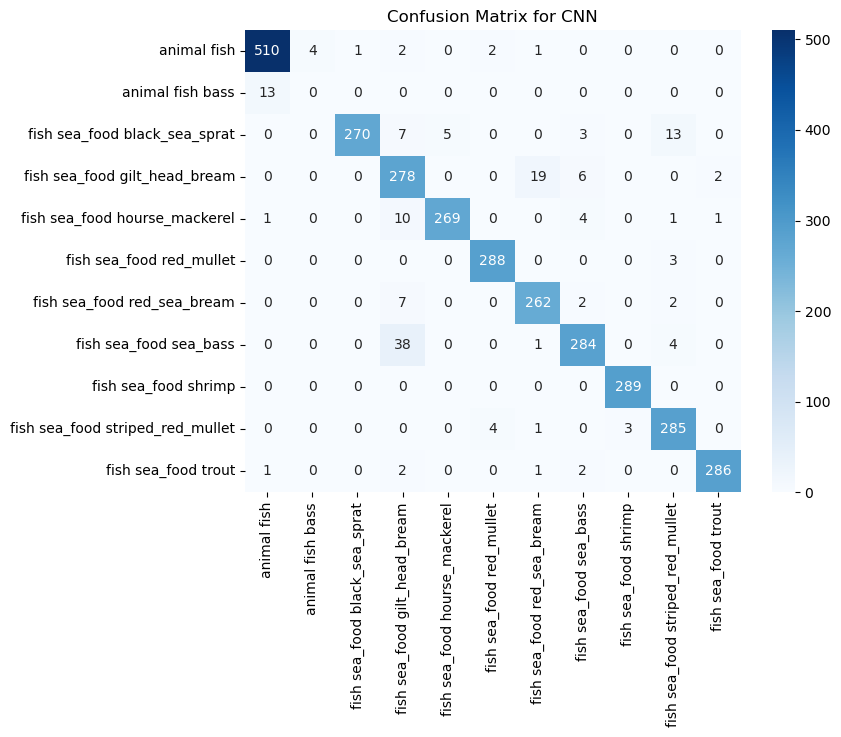

100/100 ━━━━━━━━━━━━━━━━━━━━ 659s 7s/step - accuracy: 0.9763 - loss: 0.0670
VGG16 Test Accuracy: 0.9761531352996826
100/100 ━━━━━━━━━━━━━━━━━━━━ 660s 7s/step
Classification Report for VGG16:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       520
           1       0.75      0.23      0.35        13
           2       0.96      1.00      0.98       298
           3       0.99      0.97      0.98       305
           4       0.99      0.99      0.99       286
           5       1.00      0.91      0.95       291
           6       0.99      0.99      0.99       273
           7       0.99      0.97      0.98       327
           8       0.99      1.00      0.99       289
           9       0.91      0.98      0.94       293
          10       0.99      1.00      0.99       292

    accuracy                           0.98      3187
   macro avg       0.96      0.91      0.92      3187
weighted avg       0.98      0.98      0.98      31

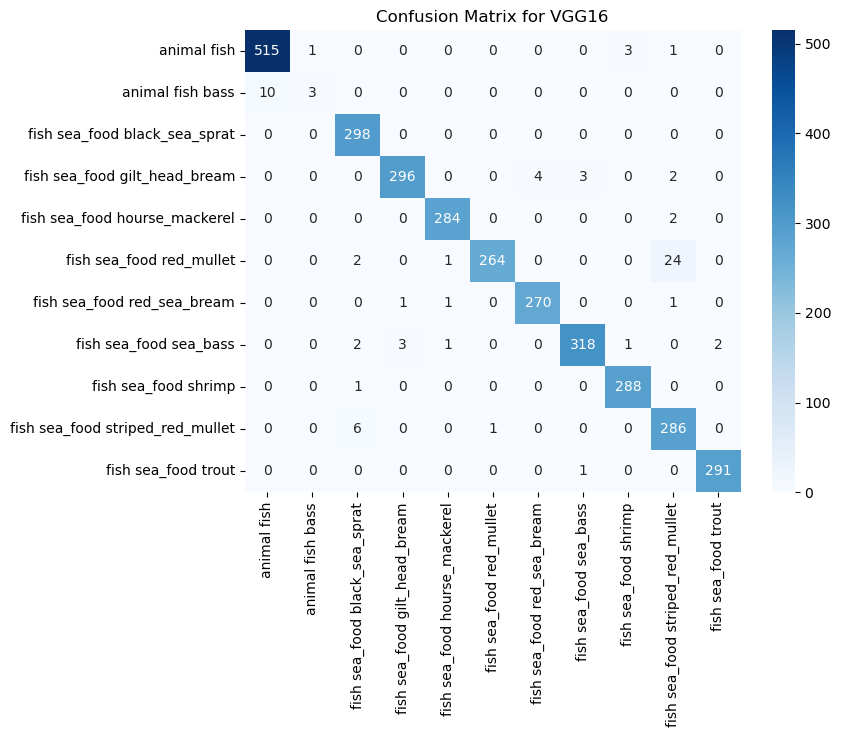

100/100 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.4507 - loss: 2.1195
ResNet50 Test Accuracy: 0.16316284239292145
100/100 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step
Classification Report for ResNet50:
              precision    recall  f1-score   support

           0       0.16      1.00      0.28       520
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00       298
           3       0.00      0.00      0.00       305
           4       0.00      0.00      0.00       286
           5       0.00      0.00      0.00       291
           6       0.00      0.00      0.00       273
           7       0.00      0.00      0.00       327
           8       0.00      0.00      0.00       289
           9       0.00      0.00      0.00       293
          10       0.00      0.00      0.00       292

    accuracy                           0.16      3187
   macro avg       0.01      0.09      0.03      3187
weighted avg       0.03      0.16      0.05 

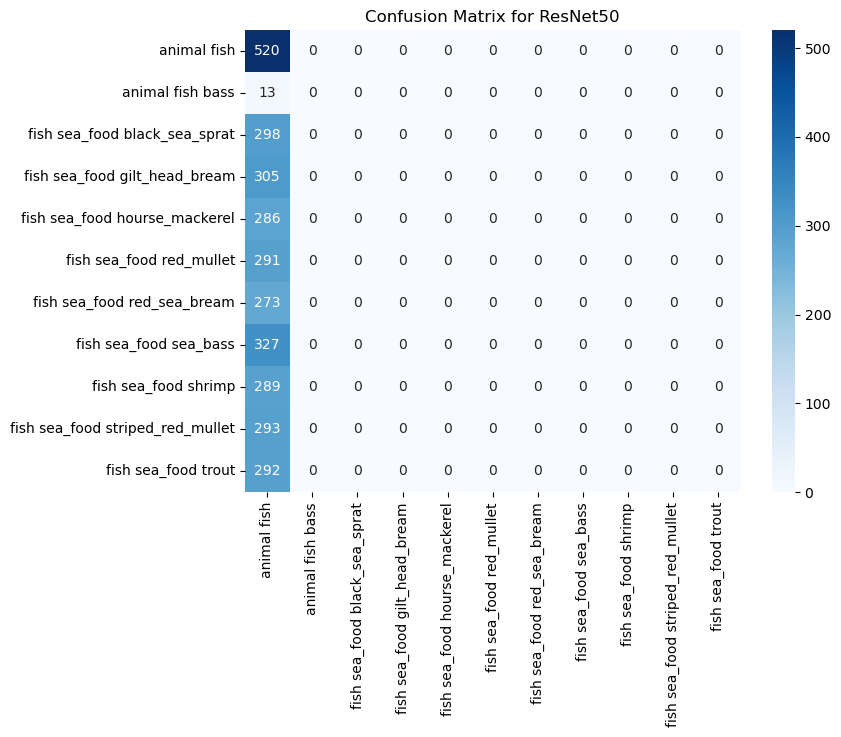

100/100 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9871 - loss: 0.0730
MobileNet Test Accuracy: 0.9855663776397705
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step
Classification Report for MobileNet:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       520
           1       0.82      0.69      0.75        13
           2       0.99      0.99      0.99       298
           3       0.96      1.00      0.98       305
           4       0.99      1.00      0.99       286
           5       1.00      0.97      0.99       291
           6       1.00      0.97      0.99       273
           7       0.99      0.98      0.99       327
           8       1.00      1.00      1.00       289
           9       0.97      0.98      0.97       293
          10       1.00      1.00      1.00       292

    accuracy                           0.99      3187
   macro avg       0.97      0.96      0.97      3187
weighted avg       0.99      0.99      0.99

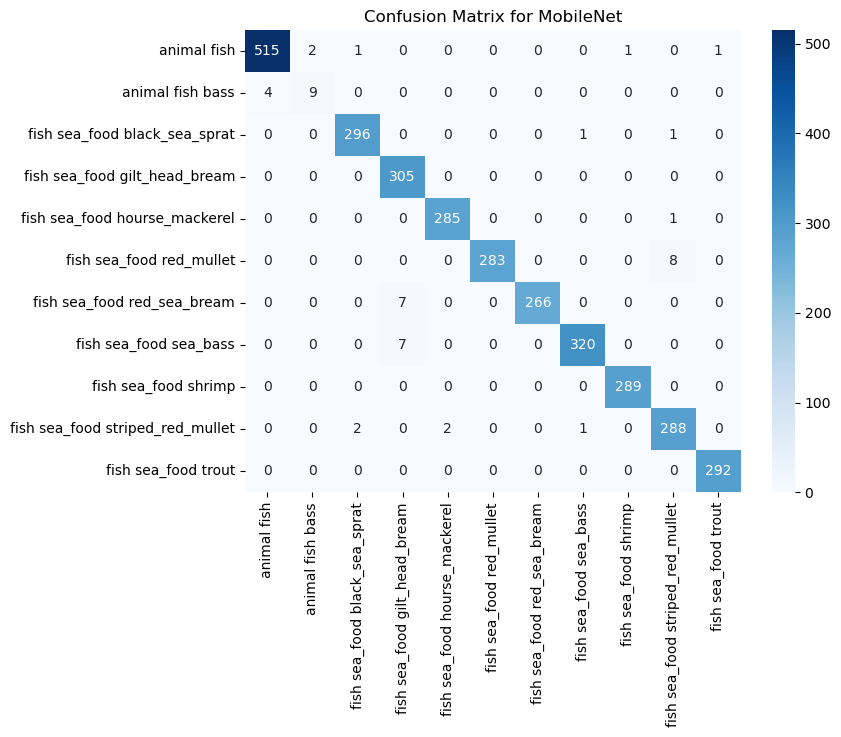

100/100 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9613 - loss: 0.1301
InceptionV3 Test Accuracy: 0.9532475471496582
100/100 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step
Classification Report for InceptionV3:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       520
           1       0.00      0.00      0.00        13
           2       0.99      0.95      0.97       298
           3       0.96      0.94      0.95       305
           4       1.00      0.89      0.94       286
           5       0.87      0.99      0.92       291
           6       0.96      0.97      0.97       273
           7       0.90      1.00      0.95       327
           8       0.99      0.99      0.99       289
           9       0.95      0.86      0.90       293
          10       0.98      0.99      0.98       292

    accuracy                           0.95      3187
   macro avg       0.87      0.87      0.87      3187
weighted avg       0.95      0.95      

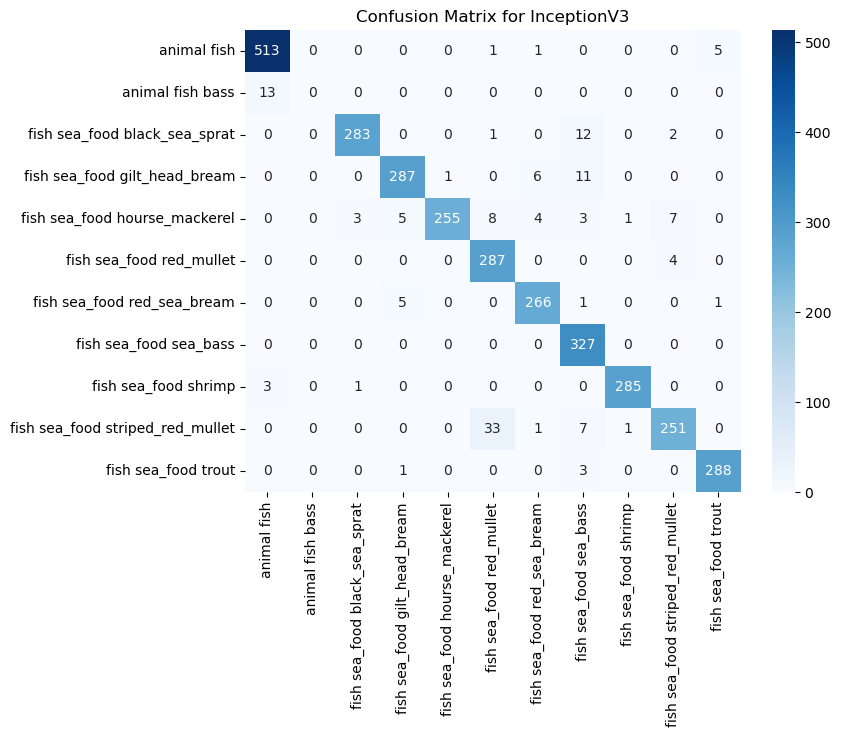

100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.4507 - loss: 2.1186
EfficientNetB0 Test Accuracy: 0.16316284239292145
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step
Classification Report for EfficientNetB0:
              precision    recall  f1-score   support

           0       0.16      1.00      0.28       520
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00       298
           3       0.00      0.00      0.00       305
           4       0.00      0.00      0.00       286
           5       0.00      0.00      0.00       291
           6       0.00      0.00      0.00       273
           7       0.00      0.00      0.00       327
           8       0.00      0.00      0.00       289
           9       0.00      0.00      0.00       293
          10       0.00      0.00      0.00       292

    accuracy                           0.16      3187
   macro avg       0.01      0.09      0.03      3187
weighted avg       0.03      0.1

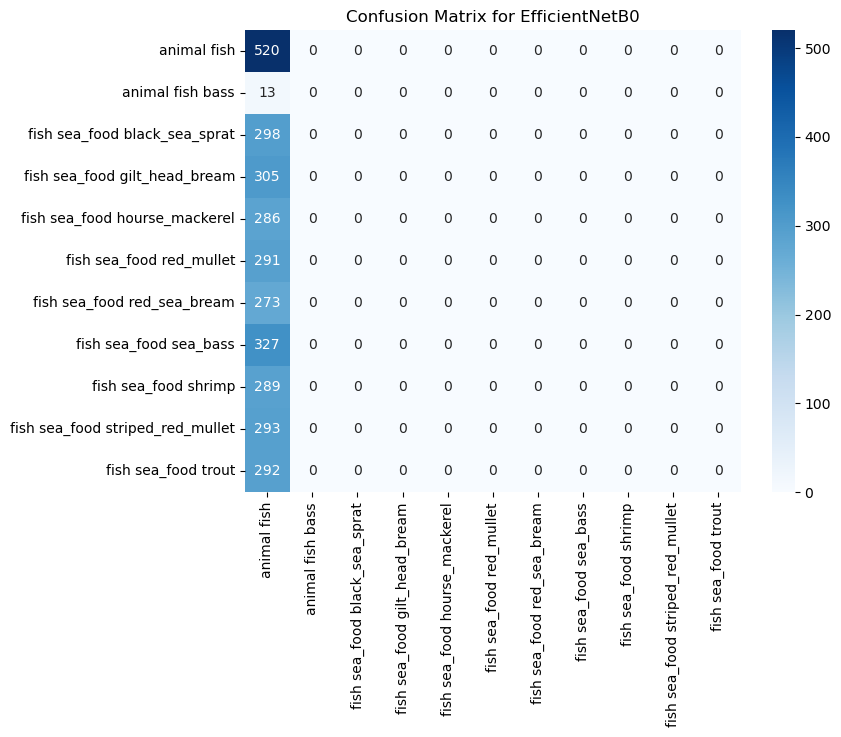

In [36]:
for i, model in enumerate(models):
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"{model_names[i]} Test Accuracy: {test_accuracy}")

    # Confusion matrix and classification report
    predictions = model.predict(test_dataset)
    preds = tf.argmax(predictions, axis=-1)

    print(f"Classification Report for {model_names[i]}:")
    print(classification_report(test_dataset.classes, preds))

    conf_matrix = confusion_matrix(test_dataset.classes, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_indices.keys(), yticklabels=test_dataset.class_indices.keys())
    plt.title(f"Confusion Matrix for {model_names[i]}")
    plt.show()

In [37]:
# Save the best model based on the evaluation
best_model = model_mobilenet 
best_model.save('model_mobilenet.h5')